In [4]:
# Getting Data
from sys import path
path.append('../..')
from getTrainingData import getTrainingData

# Get data using the improved function
data = getTrainingData(test_size=0.2, random_state=42, scale_features=True)
data

{'X_train':      category_accessories  category_dresses  category_jackets  category_jeans  \
 357             -0.088475         -0.184761         -0.403148        2.585840   
 366             -0.088475         -0.184761         -0.403148        2.585840   
 188             -0.088475         -0.184761         -0.403148       -0.386722   
 307             -0.088475         -0.184761         -0.403148       -0.386722   
 545             -0.088475         -0.184761          2.480479       -0.386722   
 ..                    ...               ...               ...             ...   
 78              -0.088475         -0.184761         -0.403148       -0.386722   
 115             -0.088475         -0.184761         -0.403148       -0.386722   
 305             -0.088475         -0.184761         -0.403148       -0.386722   
 478             -0.088475         -0.184761         -0.403148        2.585840   
 111             -0.088475         -0.184761         -0.403148       -0.386722   
 
   

# Lasso Regression
selection + regularization

In [5]:
from sklearn.linear_model import Lasso
import matplotlib.pyplot as plt
import numpy as np

# Get training and testing data from dictionary
X_train = data['X_train']
X_test = data['X_test']
y_train = data['y_train']
y_test = data['y_test']

print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")

# Display first few feature names
print(f"Example features: {data['feature_names'][:5]}")

lasso = Lasso(alpha=0.5)
lasso.fit(X_train, y_train)

# Evaluation
score = lasso.score(X_test, y_test)
print(f"R² score: {score:.4f}")

y_predictions = lasso.predict(X_test)

Training data shape: (412, 132)
Testing data shape: (103, 132)
Example features: ['category_accessories', 'category_dresses', 'category_jackets', 'category_jeans', 'category_other']
R² score: 0.7911


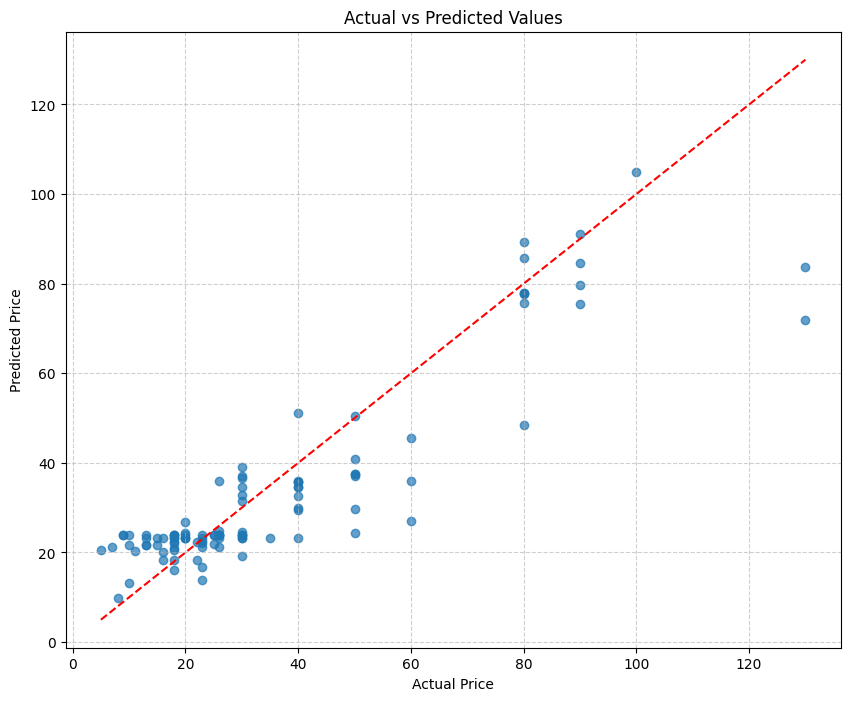

In [6]:
# Create scatter plot of actual vs predicted values
fig, ax = plt.subplots(figsize=(10, 8))

ax.scatter(y_test, y_predictions, alpha=0.7)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Perfect prediction')
ax.set_xlabel('Actual Price')
ax.set_ylabel('Predicted Price')
ax.set_title('Actual vs Predicted Values')
ax.grid(True, linestyle='--', alpha=0.6)
plt.show()